## Prediction of Gout from patient's Chief Complaint Corpa

### Is this patient potentially in need of treatment for Gout?

## Import Data
#### The data is found in the MIMIC-III (Medical Information Mart for Intensive Care III) database.  Details can be found at https://physionet.org/content/emer-complaint-gout/1.0/.   Acces to the database may be requested at (https://mimic.physionet.org/gettingstarted/access/).  The data is contained in 2 csv files from years 2019 and 2020.

In [1]:
import pickle
import pandas as pd
df = pd.read_pickle("noGoutTerm.csv")
df.shape

(8275, 2)

In [2]:
Gout_Target = df[df['target'] == 'Y']
No_Gout_Target = df[df['target'] == 'N']
print(Gout_Target.shape, No_Gout_Target.shape)

(111, 2) (8164, 2)


In [3]:
df_new = pd.concat([Gout_Target, No_Gout_Target[:111]], axis=0).reset_index(drop=True)
#df = pd.concat([syn2019, syn2020], axis=0).reset_index(drop=True)
df_new.shape

(222, 2)

###  1) Split data     2) Vectorize the corpus    3) Create an Encoded Test Target    4)Over Sample the minority Class

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['corpus'], df.target, test_size=0.33, random_state=55)

### Tf-idf vectorization

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

    # Create a vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    # Transform the training corpus
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
    # Transform the test corpus
tfidf_test = tfidf_vectorizer.transform(X_test)
    # Display a few feature names
print(tfidf_vectorizer.get_feature_names()[:10])
    # Display a few vectors
print(tfidf_train.A[:5])

['aa', 'aaa', 'aain', 'aao', 'ab', 'abandon', 'abcess', 'abcessess', 'abcessknot', 'abcesss']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Encode the target variable 

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
E_y_test = labelencoder.fit_transform(y_test)
E_y_test.shape

(2731,)

In [7]:
tfidf_train.shape

(5544, 5250)

### Address imbalanced data with oversampling

In [8]:
import imblearn
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=777)
X_ROS, y_ROS = ros.fit_sample(tfidf_train, y_train)
pd.DataFrame(tfidf_test.todense(), columns=tfidf_vectorizer.get_feature_names())

,aa,aaa,aain,aao,ab,abandon,abcess,abcessess,abcessknot,abcesss,...,zofran,zoloft,zone,zpac,zpack,zpak,zquil,zyprexa,zyrtec,zyrtecd
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.363153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
print(y_ROS.value_counts())

N    5470
Y    5470
Name: target, dtype: int64


### Below are the variables used for model builds, training, testing, and scoring

* tfidf_train:  vectorized X_train features
* tfidf_test:   vectorized X_test  target
* y_test        string version of target
* E_y_test      encoded versio of target
* y_ROS         vectorized & upsampled training target
* X_ROS         vectorized & upsampled training features (corpus)

### The methods below are used to score several models

## ROC_AUC

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [11]:
def plot_ROC(model):
   y_proba = model.predict_proba(tfidf_test)[:,1]
   false_positive_rate, true_positive_rate, thresholds = roc_curve(E_y_test, y_proba)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   print(f'roc_auc Score: {roc_auc}')
   plt.figure(figsize=(10,10))
   plt.title('Receiver Operating Characteristic')
   plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
   plt.legend(loc = 'lower right')
   plt.plot([0, 1], [0, 1],linestyle='--')
   plt.axis('tight')
   plt.ylabel('True Positive Rate')
   plt.xlabel('False Positive Rate')

## Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import f1_score

In [13]:
# Plots confusion matrix of model

def plot_confusion(model):
    prediction = model.predict(tfidf_test)
#    score = f1_score(y_test, prediction, average='weighted')
    average = 'weighted'
    print(f'F1 Score: {f1_score(y_test,prediction, average=average)}')
 #   print(score)
    mat = confusion_matrix(y_test, prediction)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('true')
    plt.ylabel('predicted')
    plt.show()

In [14]:
### Models: libraries

*** It's time to test some models, I like to start with Logistic Regression, it's known amoung data scientists to give consistently good predictive quality compared to most models with the added bonus of better CPU performance rates (faster).  Let's run one and use it as the base to compare other models ***

### Logistic Regression

roc_auc Score: 0.9372078091454483


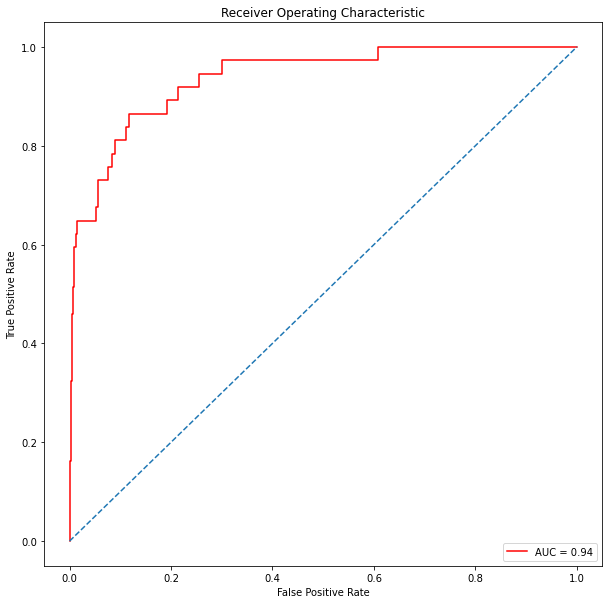

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_ROS, y_ROS)

plot_ROC(model)

F1 Score: 0.9836398842563041


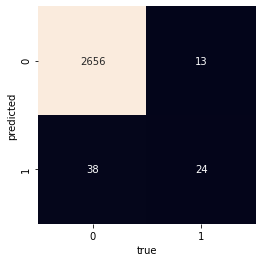

In [16]:
plot_confusion(model)

*** Okay, and ROC AUC score of 99.8% will be hard to beat but I want to do some comparisons with other models, partly because this is hard to believe, I want to see some consistent returns with other models.  From my experience in LR is performing this well Naive Bayes will be similar but probably with a 5-10% reduction, I'm predicting 89-99.5% with NB, let's see....***

### Naive Bayes Model

roc_auc Score: 0.9153875479042517


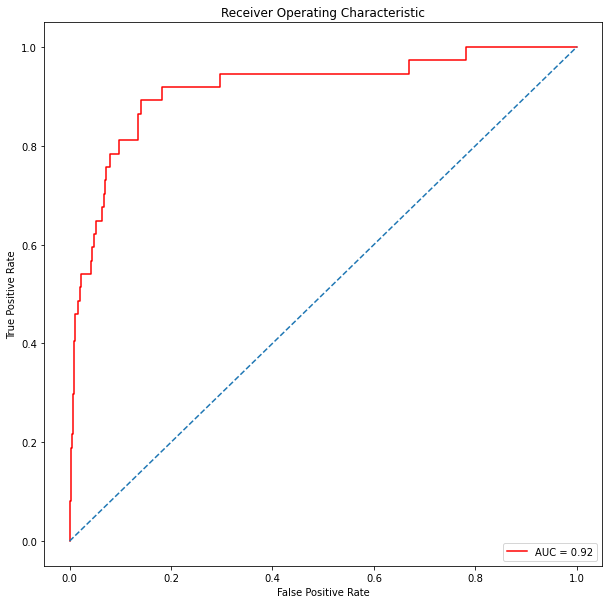

In [17]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_ROS, y_ROS)

plot_ROC(model)

F1 Score: 0.9626888540735667


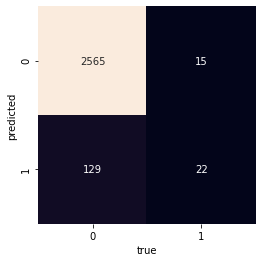

In [18]:
plot_confusion(model)

*** Okay 96.5% which is still higher than expected.  Let's look at one more model and then look at the data again.  Not that I don't like such terrific results but seems suspicious and I want to ensure I didn't overlook something giving false predictions.  The Support Vector Machine is one I like to use alot because of the way it sets boundries, unlike Linear or Logistic Regression it's boundries are dynamic, not restricted to following a line and look more like a river running through the data points according to most likely areas where 1 class stops and another starts, I love this model so let's run this one as well.  To plot the ROC, I'll need to use the method called 'decision_function' and will write the plot into the next line manually ***

### Support Vector Machine

In [19]:
from sklearn import model_selection, svm

In [20]:
model = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
model.fit(X_ROS, y_ROS)

SVC(gamma='auto', kernel='linear')

F1 Score: 0.9846741892050387


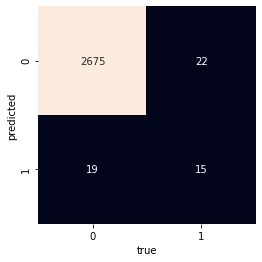

In [21]:
plot_confusion(model)

0.9227010975340596


Text(0.5, 0, 'False Positive Rate')

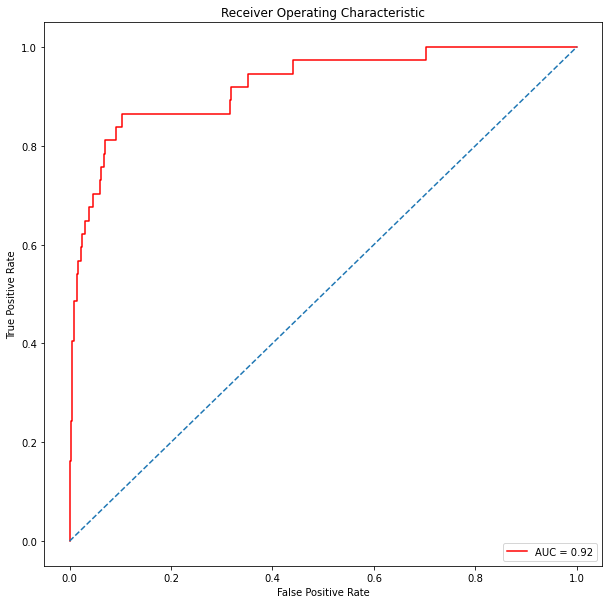

In [22]:
test_predict_label = model.fit(X_ROS, y_ROS).decision_function(tfidf_test)
fpr, tpr, threshold = roc_curve(E_y_test, test_predict_label)
roc_auc = auc(fpr,tpr)
print(roc_auc)
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

*** Wow, that's close the the LR model.  Well, it looks like oversampling boosted the models performance to a great degree but it still seems unusual, as much as I'd like to believe 99.5% feels too high.  Looking back at the corpus I see the word 'gout' is used alot explaining what is making it so easy for the models to identify gout patients, but this model is desired to create a prediction, to help humans identify potential Gout that midght go missed without a warning.  Anyone can read the word 'gout', but we want to find the less identifiable.  Let's go back, remove the word 'gout' from the whole corpus and see how the performance looks. ***

### Tune model: testing 'alpha' hyper parameter

In [23]:
# Create the list of alphas: alphas
import numpy as np
alphas = np.arange(0, 1, .1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(X_ROS, y_ROS)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = f1_score(y_test, pred, average='weighted')
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.9769939368594477

Alpha:  0.1
Score:  0.974822802773224

Alpha:  0.2
Score:  0.9732195183741835

Alpha:  0.30000000000000004
Score:  0.9728830327426614

Alpha:  0.4
Score:  0.9710081152957354

Alpha:  0.5
Score:  0.9689976054479617

Alpha:  0.6000000000000001


/opt/anaconda3/envs/mimicnlp/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Score:  0.9679358108631723

Alpha:  0.7000000000000001
Score:  0.9660369747340448

Alpha:  0.8
Score:  0.9655183906740241

Alpha:  0.9
Score:  0.9644687460295612



roc_auc Score: 0.9141736391179599


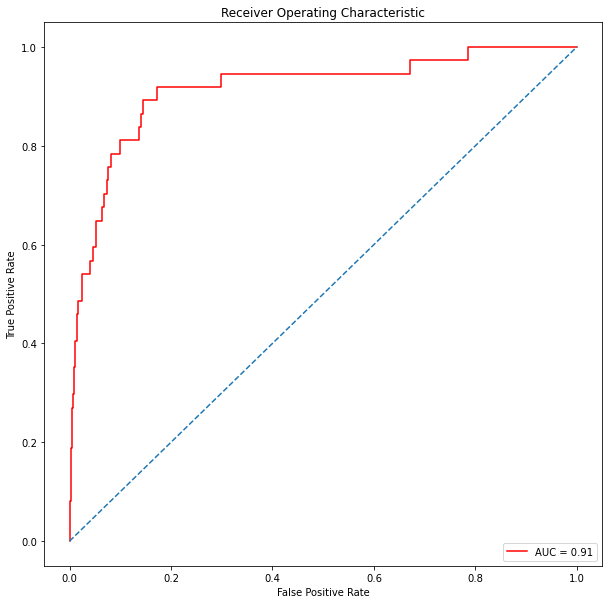

In [24]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha=0.8)
model.fit(X_ROS, y_ROS)

plot_ROC(model)

F1 Score: 0.9655183906740241


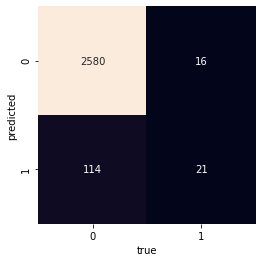

In [25]:
plot_confusion(model)

*** Tuning the alpha resulted in a more balanced result, the number of false negatives dropped to 39 from 96 but at the cost of doubling false positives, let's see if adding weight to the imbalanced class in a logistic regression gives better results rather than using the oversampling technique. ***

### Run LR model without hyperparameter tuning

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
weights = {0:1000,1:100}
lg = LogisticRegression(random_state=13, class_weight='balanced')
# fit it
lg.fit(tfidf_train,y_train)
# test
y_pred = lg.predict(tfidf_test)
# performance
average = 'weighted'
print(f'F1 Score: {f1_score(y_test,y_pred, average=average)}')

F1 Score: 0.9799824702038946


F1 Score: 0.9655183906740241


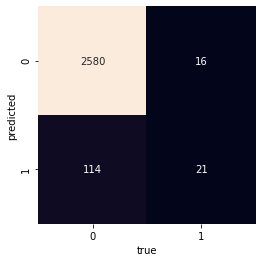

In [28]:
plot_confusion(model)
plt.show()

*** Clearly an improvement just using LR, let's see what happens with weights ***

In [29]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000}]
param_grid = dict(class_weight=w)

In [30]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()
Y = y_train.copy(deep=True)
Y = label_encoder.fit_transform(Y)  # encode
Y = np.ravel(Y)                     # reshape

In [31]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
lg3 = LogisticRegression(random_state=13)
grid = GridSearchCV(lg3, param_grid = param_grid, scoring="f1", cv=cv, n_jobs=-1, refit=True)
grid.fit(tfidf_train, Y)

/opt/anaconda3/envs/mimicnlp/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LogisticRegression(random_state=13), n_jobs=-1,
             param_grid={'class_weight': [{0: 1000, 1: 100}, {0: 1000, 1: 10},
                                          {0: 1000, 1: 1.0}, {0: 500, 1: 1.0},
                                          {0: 400, 1: 1.0}, {0: 300, 1: 1.0},
                                          {0: 200, 1: 1.0}, {0: 150, 1: 1.0},
                                          {0: 100, 1: 1.0}, {0: 99, 1: 1.0},
                                          {0: 10, 1: 1.0}, {0: 0.01, 1: 1.0},
                                          {0: 0.01, 1: 10}, {0: 0.01, 1: 100},
                                          {0: 0.001, 1: 1.0},
                                          {0: 0.005, 1: 1.0}, {0: 1.0, 1: 1.0},
                                          {0: 1.0, 1: 0.1}, {0: 10, 1: 0.1},
                                          {0: 100, 1: 0.1}, {0: 10, 1: 0.01},
 

In [32]:
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.33093166093166093 with param: {'class_weight': {0: 100, 1: 1000}}


roc_auc Score: 0.9372078091454483


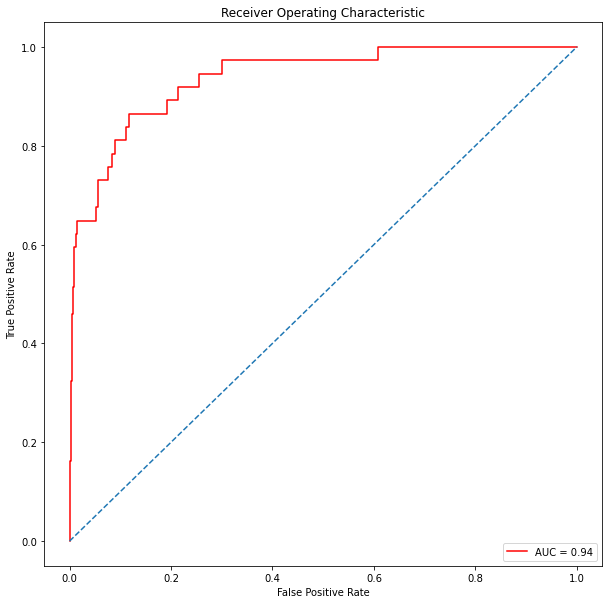

In [33]:
model = LogisticRegression(random_state=13, class_weight=[{0:100,1:1000}])
model.fit(X_ROS, y_ROS)

plot_ROC(model)

In [34]:
lg = LogisticRegression(random_state=13, class_weight=[{0:10,1:1000}])
# fit it
lg.fit(tfidf_train,y_train)
# test
y_pred = lg.predict(tfidf_test)
# performance
average = 'weighted'
print(f'Accuracy Score: {f1_score(y_test,y_pred, average=average)}')

Accuracy Score: 0.9797239747767146


F1 Score: 0.9797239747767146


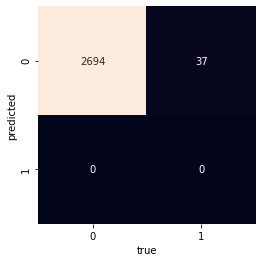

In [35]:
plot_confusion(lg)
plt.show()

### There is an interesting change in the confusion matrix, the no of false negatives is increased, false positives decreased to 1.  The tuning the weights can be used to reduce false positives. 